In [204]:

import torch
import os
import pandas as pd
import seaborn as sns

# Section 2.1


## Data Manipulation

In [ ]:
x = torch.arange(12, dtype=torch.float32)D
x

In [ ]:
x = torch.arange(12).float()
x

In [ ]:
x.numel()

In [ ]:
x.shape

In [ ]:
X = x.view(3,4)
X

In [ ]:
x
x.reshape(3,-1)
x

In [ ]:
torch.zeros((2,3,4))

In [ ]:
torch.ones((2,3,4))

In [ ]:
print (torch.randn(3,4))

In [ ]:
torch.randn(3,4)

In [ ]:
torch.tensor([[2, 2, 4, 3],
              [1, 2, 3, 4],
              [4, 3, 2, 1]])


In [ ]:
X[-1], X[1:3]

In [ ]:
print (X)
print (X[1, 2].item())
X[1, 2] = 17
print (X)
print (X[1, 2].item())

In [ ]:
X[:2, :] = 12
X

In [ ]:
torch.exp(x)

In [ ]:
x.exp()

In [ ]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x+y, x-y, x*y, x**y


In [ ]:
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X,Y),dim=0), torch.cat((X,Y),dim=1)

In [ ]:
X > Y

In [ ]:
a = torch.arange(6).view((2, 3, 1))
b = torch.arange(3).view((1, 3))

# 2 x 3 x 1
#     1 x 3

a.shape, b.shape

In [ ]:
print (a.shape)
print (a)
print (b)
a*b

In [ ]:
A = torch.randn((8,1,6,1))
B = torch.randn((7, 1, 5))

print (f'{A.shape=}')
print (f'{B.shape=}')

# 8 x 1 x 6 x 1
#     7 x 1 x 5

C = A*B
print (f'{C.shape=}')

a = torch.randn((2, 3, 1))
b = torch.randn((1, 3))

print (f'{a.shape=}')
print (f'{b.shape=}')

# 2 x 3 x 1
#     1 x 3

c = a*b
print (f'{c.shape=}')





In [ ]:
before = id(Y)
print (before)
Y = Y + X
print (id(Y))
id(Y) == before

In [ ]:
Z = torch.zeros_like(Y)
print (f'{id(Z)=}')
Z[:] = X + Y
print (f'{id(Z)=}')


In [ ]:
X = torch.zeros_like(Y)
print (f'{id(X)=}')
X +=  Y
print (f'{id(X)=}')

In [ ]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

In [ ]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

# Section 2.2

## Data Processing

In [ ]:
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [ ]:
data = pd.read_csv(data_file)

display (data)

In [ ]:
display(data)
print(f'{data.shape=}')
display(data.iloc[0])
print(f'{data.iloc[0].shape=}')


In [ ]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:,2]
display(inputs), display(targets);

In [ ]:
display (inputs)
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs = inputs.fillna(inputs.mean())
display (inputs)


In [ ]:
X, y = torch.tensor(inputs.values), torch.tensor(targets.values)

X, y

In [ ]:
data = pd.read_csv('../kaggle/titanic/data/train.csv')

In [207]:
inputs, targets = data.iloc[:,2:], data.iloc[:,1]
inputs = inputs.drop(labels=['Name','Ticket','Cabin'], axis=1)
#display(inputs)
#display(targets)

display(inputs.groupby(['Pclass','Sex'])['Age'].mean())

display(inputs.groupby(['Sex'])['Age'].mean())

display(inputs['Age'].mean())

print (38.2 - 38.2/38.2**0.5)





Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

29.69911764705882

32.019385143855025


In [202]:
display(inputs)

print (inputs.isna().sum())

inputs = inputs.fillna(inputs.groupby(['Sex','Pclass']).transform('mean',numeric_only=True))

inputs =  pd.get_dummies(inputs)

display(inputs)
display(targets)

print (inputs.isna().sum())


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.00,1,0,7.2500,0,1,0,0,1
1,1,38.00,1,0,71.2833,1,0,1,0,0
2,3,26.00,0,0,7.9250,1,0,0,0,1
3,1,35.00,1,0,53.1000,1,0,0,0,1
4,3,35.00,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.00,0,0,13.0000,0,1,0,0,1
887,1,19.00,0,0,30.0000,1,0,0,0,1
888,3,21.75,1,2,23.4500,1,0,0,0,1
889,1,26.00,0,0,30.0000,0,1,1,0,0


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [193]:
print (inputs.isna().sum())

inputs['Age'] = inputs['Age'].fillna(inputs.groupby('Sex')['Age'].transform('mean'))

In [ ]:
display(inputs)

In [203]:
inputs

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.00,1,0,7.2500,0,1,0,0,1
1,1,38.00,1,0,71.2833,1,0,1,0,0
2,3,26.00,0,0,7.9250,1,0,0,0,1
3,1,35.00,1,0,53.1000,1,0,0,0,1
4,3,35.00,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.00,0,0,13.0000,0,1,0,0,1
887,1,19.00,0,0,30.0000,1,0,0,0,1
888,3,21.75,1,2,23.4500,1,0,0,0,1
889,1,26.00,0,0,30.0000,0,1,1,0,0


/var/folders/g3/s8dw43sn4cbb99pp7s3zn8vc0008fx/T/ipykernel_42847/167922816.py:1: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.histplot(data=inputs,x='Age',hue='Pclass',kde=True, multiple="stack",palette = sns.color_palette("colorblind"))


<AxesSubplot: xlabel='Age', ylabel='Count'>

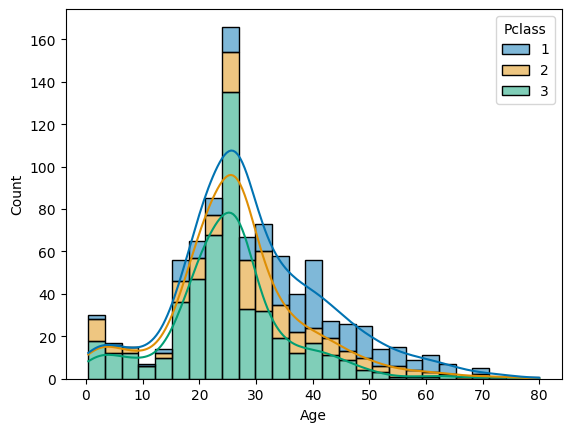

In [237]:


sns.histplot(data=inputs,x='Age',hue='Pclass',kde=True, multiple="stack",palette = sns.color_palette("colorblind"))